 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Abstraction
- Inheritance
- Polymorphism


## 1 ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

In [14]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

class Video():
    def __init__(self):
        self.title = None
        self.length = timedelta()
        self.link = generic_image
    def play(self):
        print(f"Now playing: {self.title}")
        display(Image(self.link))
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long."

In [10]:
class Video():
    def __init__(self):
                
        self.title = None
       
        #action methods
        self.rewind =
        self.fast_forward = 
        self.pause = 
        self.play =        
        self.play_previous =
        self.skip_intro = 
        self.download =
        
        #settings method
        self.language =
        self.play_speed =
        self.captions =
        self.volume =
        
        #display methods
        self.display_info = 
        self.length = timedelta()
        self.current_time = 
        self.link = generic_image       
        
        
        
    def play(self):
        print(f"Now playing: {self.title}")
        display(Image(self.link))

    def rewind(self):
        if self.current_time > 0:
            self.current_time -= 10
    def fast_foward(self):
        if self.current_time != self.length:
            self.current_time += 10
        
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long."
    
    def action(self):
        pass

SyntaxError: invalid syntax (3001774013.py, line 7)

Now playing: None


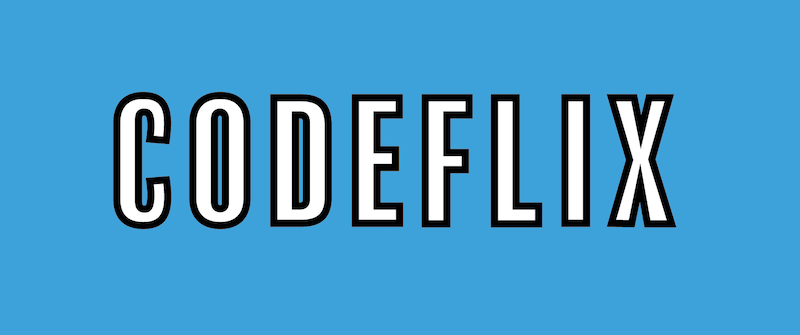

In [37]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

class Video():
    def __init__(self):
        self.title = None
        self.length = timedelta()
        self.link = generic_image
        
    def play(self):
        print(f"Now playiong {self.title}")
        display(Image(self.link))
        
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long."
    
    my_video = Video()
    my_video.play()

## 2 ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user. We have a bit to do before this becomes visible. But you've seen it before with presenting the user with the option to enter inputs. We then take those input and do something with them.
<br><br>


In [15]:
class Episode(Video):
    def __init__(self, data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        if data['runtime']:
            self.length = timedelta(minutes = data['runtime'])
        else:
            self.length = timedelta(minutes = 30)
        if data['image']:
            self.link = data['image']['medium']
        else:
            self.link = generic_image

## 3 INHERITANCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [23]:
class Series():
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.title = None
        self.genres = []
        self.episodes = []
    def get_info(self, query = ''):
        data = None # <-- in case we can't find the show we are looking for
        while not data:
            if not query:
                query = input("What is the name of the series? ")
                res = requests.get(f"https://api.tvmaze.com/singlesearch/shows?q={query}")
                if res.status_code == 200:
                    data = res.json()
                else:
                    print(f"Series Error: status code {res.status_code}")
                    query = ''
            else:
                res = requests.get(f"https://api.tvmaze.com/singlesearch/shows?q={query}")
                if res.status_code == 200:
                    data = res.json()
                else:
                    print(f"Series Error: status code {res.status_code}")

            # use data to build out our attributes
            self.id = data['id']
            self.title = data['name']
            self.genres = [genre for genre in data['genres']]
            if data['network']:
                self.network = data['network']['name']
            else:
                self.network = data['webChannel']['name']

            # api call for episodes
            res = requests.get(f'https://api.tvmaze.com/shows/{self.id}/episodes')
            if res.status_code == 200:
                episodes = res.json()
            else:
                print(f"Episode Error: status code {res.status_code}")

            # setting attributes from show api call ^
            # setting attributes from episode api call v
            self.seasons = episodes[-1]['season']
            self.episodes = [Episode(ep) for ep in episodes]
            print(f"{self.title} has {len(self.episodes)} episodes")
    
    def watch(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? also get a job. <y/n>").lower().strip()
                if watching not in ('yes', 'y', 'yeah', 'ye', 'affirmative', 'aye aye captain'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)

    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"Title: {self.title}"

In [21]:
first_show = Series()
first_show.get_info()

Adventure Time has 278 episodes


Now playing: Slumber Party Panic


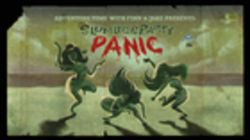

Now playing: Trouble in Lumpy Space


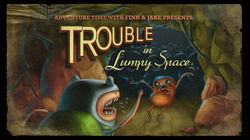

Now playing: Prisoners of Love


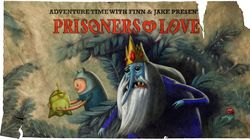

Now playing: Tree Trunks


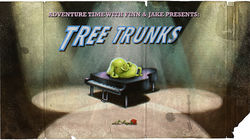

Now playing: The Enchiridion!


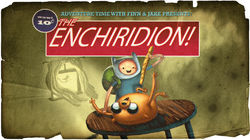

Now playing: The Jiggler


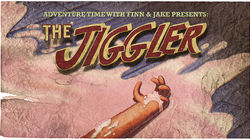

In [22]:
first_show.watch()

## 4 POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


In [27]:
class User:
    id_counter = 1
    def __init__(self, username, password):
        self.username = username
        self.password = password[::-2]
        self.id = User.id_counter
        User.id_counter += 1
        self.watch_list = []
    def __str__(self):
        formatted_user = f"""
        {self.id} - {self.username.title()}
        pw: {self.password}
        """
        return formatted_user
    def __repr__(self):
        return f"<User {self.id} | {self.username}>"
    def check_password(self, password_guess):
        return self.password == password_guess[::-2]

In [34]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

class Theater():
    def __init__(self):
        self.users = set()
        self.current_user = None

    # add a user
    def add_user(self):
        username = input("Please enter a username: ")
        if username in {u.username for u in self.users}:
            print("User with that name already exists. Please try again!")
        else:
            password = input("Please enter your password. ")
            user = User(username, password)
            self.users.add(user)
            print(f"{user} has been created!!!")
        self.login_user()

    # choose a user
    def login_user(self):
        username = input("What is your username? ")
        password = input("What is your password? ")
        for user in self.users:
            if user.username == username and user.check_password(password):
                self.current_user = user
                print(f"{user} has logged in")
                break
        else: print("Username and/or password is incorrect!")

    def logout(self):
        self.current_user = None
        print("You have successfully logged out!")

    def update_user(self):
        if self.current_user:
            print(self.current_user)
            new_user = input("Please enter the updated username or enter skip to keep your current username...").lower()
            if new_user != 'skip':
                self.current_user.username = new_user
            new_pw = input("Please enter the updated password or enter skip to skip...")
            if new_pw.lower() != 'skip':
                self.current_user.password = new_pw
            print(f"{self.current_user.username}'s info has been updated!")
        else:
            print("Please login to update user info")
            self.login_user()

    # creating and using watchlist which is an attribute of the User class
    def add_to_watchlist(self, query = ''):
        show = Series()
        show.get_info(query)
        self.current_user.watch_list.append(show)
        print(f"{show.title} has been added to the watchlist!")

    # view watchlist
    def view_watch_list(self):
        for series in self.current_user.watch_list:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\nSummary: \n {series.summary}")
            display(Image(series.episodes[0].link))

    def delete(self):
        print("Your current watchlist:")
        self.view_watch_list()
        response = input("What would you like to remove from your watchlist? ")
        for series in self.current_user.watch_list:
            if series.title.title() == response.title():
                self.current_user.watch_list.remove(series)
                print(f"{response.title()} has been removed from your watchlist!")
                break
        else: print("That title is not in your watchlist!")
        self.view_watch_list()

    # choose from watchlist
    def choose_from_watch_list(self):
        self.view_watch_list()
        watch = input("What would you like to watch? ")
        # if watch.lower() in list(map(lambda x: x.title.lower(), self.current_user.watch_list)):
        for series in self.current_user.watch_list:
            if series.title.lower() == watch.lower().strip():
                print("...........")
                sleep(2)
                print("...........")
                series.watch()
                break
        else:
            response = input(f"{watch} is not in your watchlist... would you like to add it? <y/n>")
            if response in ('yes', 'y'):
                self.add_to_watchlist(watch)
                print("...........")
                sleep(2)
                print("...........")
                self.current_user.watch_list[-1].watch()

    # run function that gives us that sweet, sweet sauce... or spicy if that's your preference
    def run(self):
        """
        Method that allows users to choose a series and play episodes and other cool stuff too!
        """
        display(Image(generic_image))
        
        if self.users:
            self.login_user()
        else:
            self.add_user()

        print("""
        Options:
        Add - add a new user
        Update - update user info
        Login - login to your profile
        Logout - logout of your profile
        Search - search for shows
        Watch - pick something from your watchlist
        View - view watchlist
        Delete - delete from watchlist
        Quit - close the application
        """)

        while True:
            response = input("What would you like to do? (add, update, login, logout, search, watch, view, delete, quit) ").lower()
            if response == 'search':
                self.add_to_watchlist()
            elif response == 'watch':
                self.choose_from_watch_list()
            elif response == 'add':
                self.add_user()
            elif response == 'update':
                self.update_user()
            elif response == 'login':
                self.login_user()
            elif response == 'logout':
                self.logout()
                new_response = input("What would you like to do next? ").lower()
                if new_response == 'add':
                    self.add_user()
                elif new_response == 'login':
                    self.login_user()
                elif new_response == 'quit':
                    print("Thanks for watching!")
                    break
            elif response == 'view':
                self.view_watch_list()
            elif response == "delete":
                self.delete()
            elif response == 'quit':
                print(f"Thanks for watching, {self.current_user}! Have a nice day!")
                break
            else:
                print("Invalid Input: please choose from the list!")

In [31]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

class Theater():
    def __init__(self):
        self.users = set()
        self.current_user = None
        
    # add a user
    def add_user(self):
        username = input("Please enter a username: ")
        
        if username in {u.username for u in self.users}:
            print("User with that name already exists. Please try again!")
        else:
            password = input("Please enter your password. ")
            user = User(username, password)
            self.users.add(user)
            print(f"{user} has been created!!!")
            
        self.login_user()
        
        
    #choose a user
    def login_user(self):
        username = input("What is your username? ")
        password = input("What is your password? ")
        
        for user in self.users:
            if user.username == username and user.check_password(password):
                self.current_user = user
                print(f"{user} has logged in")
                break
                
        else:
            print("Username and/or password is incorrect!")
            
    def logout(self):
        self.current_user = None
        print("You have succesfully logged out!")
        
    def update_user(self):
        if self.current_user:
            print(self.current_user)
            new_user = input("Please enter the updated username or enter skip to keep your current username...")
            if new_user.lower() != "skip":
                self.current_user.username = new_user
            new_pw = input("Please enter the updated password or enter skip to skip...")
            if new_pw.lower() != 'skip':
                self.current_user.password = new_pw
            print(f"{self.current_user.username}'s info has been updated!")
                  
        else:
            print("Please login to update user info")
            self.login_user()
            
            
    #creating and using watchlist which is an attribute of the User class
    def add_to_watchlist(self, query=''):
        show = Series()
        show.get_info(query)
        
        self.current_user.watch_list.append(show)
        
        print(f"{show.title} has been added to the watchlist! ")
        
    #view watchlist
    def view_watch_list(self):
        for series in self.current_user.watch_list:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\nSummary: \n {series.summary}")
            display(Image(series.episodes[0].link))
            
    def delete(self):
        print("Your current watchlist: ")
        self.view_watch_list()
        
        response = input("What would you like to remove from your watchlist? ")
        
        for series in self.current_user.watch_list:
            if series.title.title() == response.title():
                self.current_user.watch_list.remove(series)
                print(f"{response.title()} has been removed from your watch list! ")
                break
                
        else:
            print("That title is not in your watchlist!")
        
        self.view_watch_list()
        
        
    #choose from watchlist
    def choose_from_watch_list(self):
        self.view_watch_list()
        
        watch = input("What would you like to watch? ")
#         if watch.lower() in list(map(lambda x: x.title.lower(), self.current_user.watch_list)):
        for series in self.current_user.watch_list:
            if series.title.lower() == watch.lower().strip():
                print("............")
                sleep(2)
                print("............")
                series.watch()
                break
                
        else:
            response = input(f"{watch} is not in your watchlist...would you like to add it y/n>")
            if response in ('yes', 'y'):
                self.add_to_watchlist(watch)
                
                print(".............")
                sleep(2)
                print(".............")
                self.current_user.watch_list[-1].watch()
                
                
                
    # run function that gives us that sweet, sweet sauce...or spicy if thats your preference or both
    def run(self):
        """
        Method that allows users to choose a series and play episodes and other cool stuff too!
        """
        display(Image(generic_image))
        
        if self.users:
            self.login_user()
        else:
            self.add_user()
            
        print("""
        Options:
        Add - add a new user
        Login - login to your profile 
        Update - update user info
        Logout - logout of your profile
        Search - search for shows
        Watch - pick something from your watchlist
        View - view watchlist
        Delete - delete from watchlist
        Quit - close the application
        """)
        
        while True:
            response = input("What would you like to do? (add, update, login, logout, search, watch, view, delete, quit)").lower()
            
            if response== 'search':
                self.add_to_watchlist()
                
            elif response == "watch":
                self.choose_from_watch_list()
                
            elif response == 'add':
                self.add_user()
            elif response == 'logout':
                self.logout()
                new_response = input("What would you like to do next? add/login/quit").lower()
                if new_response == 'add':
                    self.add_user()
                elif new_response == 'login':
                    self.login_user()
                elif new_response == 'quit':
                    print("Thanks for watching!")
                    break
                    
            elif response == 'login':
                self.login_user()
                
            elif response == 'update':
                self.update_user()
                
            elif response == 'view':
                self.view_watch_list()
            elif response == "delete":
                self.delete()
            elif response == "quit":
                print(f"Thanks for watching, {self.current_user}! Have a nice day!")
                break
                
            else:
                print("Invalid Input: please choose from the list!")

In [35]:
codeflix = Theater()

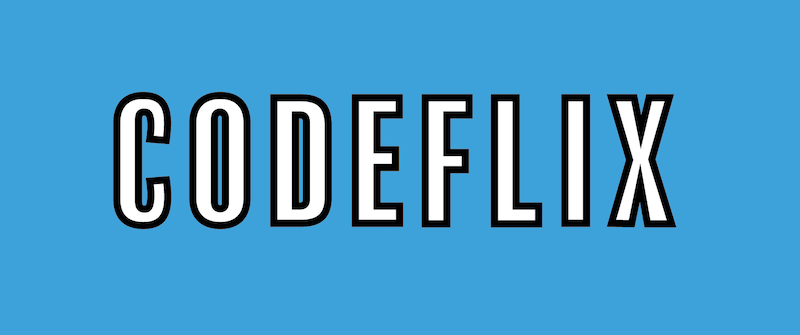


        4 - Htae
        pw: fs
         has been created!!!
Username and/or password is incorrect!

        Options:
        Add - add a new user
        Update - update user info
        Login - login to your profile
        Logout - logout of your profile
        Search - search for shows
        Watch - pick something from your watchlist
        View - view watchlist
        Delete - delete from watchlist
        Quit - close the application
        

        4 - Htae
        pw: fs
         has logged in
Rick and Morty has 61 episodes
Rick and Morty has been added to the watchlist!
...........
...........
Now playing: Pilot


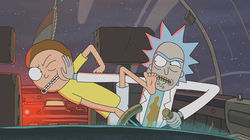

Now playing: Lawnmower Dog


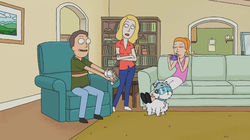

Now playing: Anatomy Park


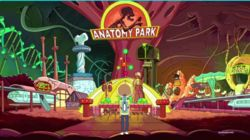

Now playing: M. Night Shaym-Aliens!


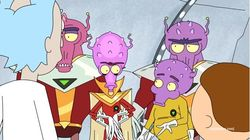

Now playing: Meeseeks and Destroy


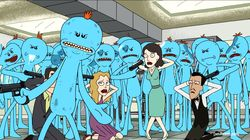

Now playing: Rick Potion #9


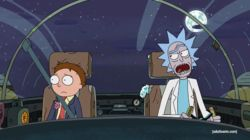



Title: Rick and Morty | Episodes: 61

Summary: 
 None


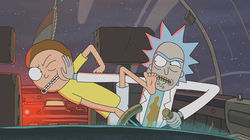



Title: Rick and Morty | Episodes: 61

Summary: 
 None


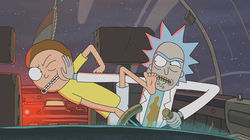

SpongeBob SquarePants has 528 episodes
SpongeBob SquarePants has been added to the watchlist!
...........
...........
Now playing: Help Wanted


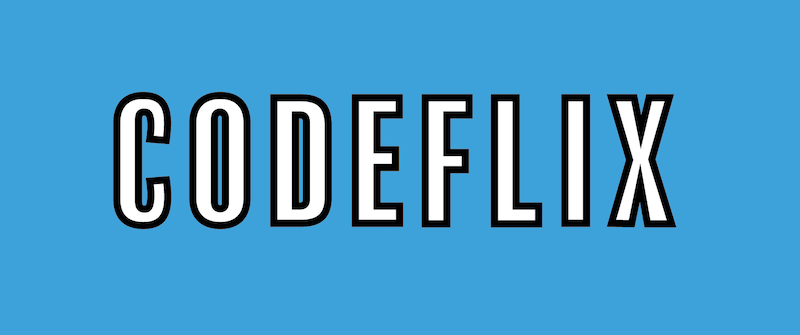

Now playing: Reef Blower


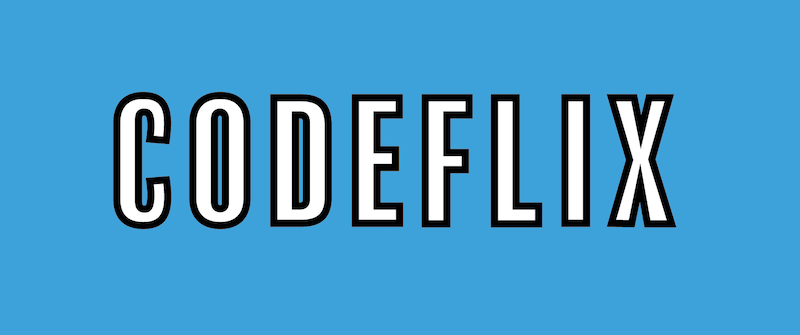

Now playing: Tea at the Treedome


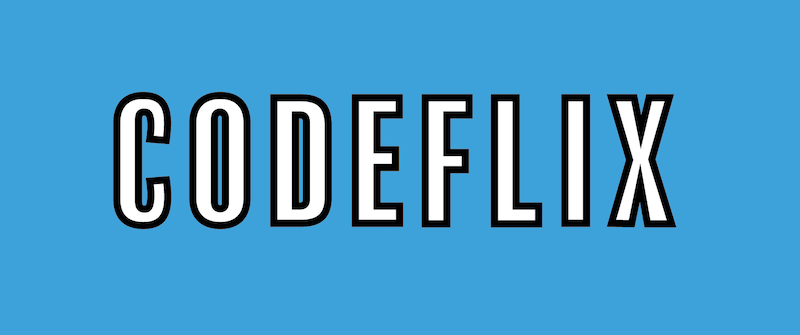


        4 - Htae
        pw: fs
        
jack's info has been updated!
Thanks for watching, 
        4 - Jack
        pw: 
        ! Have a nice day!


In [36]:
codeflix.run()

##  Exercise 1:
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...

In [12]:
class Show:
    def __init__(self, data):
        self.id = data.get('id', '')
        self.name = data.get('name', '')
        self.genres = data.get('genres', [])
        self.rating = data.get('rating', {}).get('average', 0.0)
    def __repr__(self):
        return f"<Show rating: *{self.rating}* | {self.name}>"
    def add_to_watchlist(self, user):
        if not user:
            print('No user provided.')
            return
        if self in user.watch_list:
            print(f'{self.name} is already in {user.username}\'s watchlist.')
            return
        user.watch_list.append(self)
        print(f'{self.name} has been added to {user.username}\'s watchlist.')

In [7]:
import requests

class ShowRatingSorter:
    def __init__(self):
        self.shows = []
        self.get_all_shows()

    def get_all_shows(self):
        response = requests.get(f'https://api.tvmaze.com/shows')
        data = response.json()
        self.shows = [Show(show) for show in data]

    def sort_shows_by_rating(self):
        self.get_all_shows()
        self.shows.sort(key=lambda s: s.rating if s.rating is not None else float('-inf'), reverse=True)

    def get_top_unwatched_shows(self, user, count=5):
        top_unwatched_shows = []
        for show in self.shows:
            if show not in user.watch_list:
                top_unwatched_shows.append(show)
            if len(top_unwatched_shows) == count:
                break
        return top_unwatched_shows

    def get_highest_rated_unwatched_show(self, user):
        unwatched_shows = self.get_top_unwatched_shows(user, count=1)
        if unwatched_shows:
            return unwatched_shows[0]
        else:
            return None

In [8]:
class User:
    id_counter = 1
    def __init__(self, username, password):
        self.username = username
        self.password = password[::-2]
        self.id = User.id_counter
        User.id_counter += 1
        self.watch_list = []
    def __str__(self):
        formatted_user = f"""
        {self.id} - {self.username.title()}
        pw: {self.password}
        """
        return formatted_user
    def __repr__(self):
        return f"<User {self.id} | {self.username}>"
    def check_password(self, password_guess):
        return self.password == password_guess[::-2]
    def add_to_watchlist(self, show):
        show.add_to_watchlist(self)

In [13]:
def run():
    # create a user and instantiate the ShowRatingSorter class
    user = User("htae", "password")
    sorter = ShowRatingSorter()

    # sort all the shows by rating, default highest to lowest
    sorter.sort_shows_by_rating()

    # add the top 5 unwatched shows to the user's watchlist
    unwatched_shows = sorter.get_top_unwatched_shows(user, count=5)
    for show in unwatched_shows:
        user.add_to_watchlist(show)

    # if all 5 shows have been watched, add the next 5 unwatched shows
    while len(user.watch_list) < 10:
        unwatched_shows = sorter.get_top_unwatched_shows(user, count=5)
        for show in unwatched_shows:
            user.add_to_watchlist(show)
    
    # print the user's watchlist
    print(f"{user.username.title()}'s Watchlist:")
    for show in user.watch_list:
        print(show)

run()

Breaking Bad has been added to htae's watchlist.
Game of Thrones has been added to htae's watchlist.
Firefly has been added to htae's watchlist.
The Wire has been added to htae's watchlist.
Stargate SG-1 has been added to htae's watchlist.
Person of Interest has been added to htae's watchlist.
Fargo has been added to htae's watchlist.
Death Note has been added to htae's watchlist.
House has been added to htae's watchlist.
Fringe has been added to htae's watchlist.
Htae's Watchlist:
<Show rating: *9.3* | Breaking Bad>
<Show rating: *9* | Game of Thrones>
<Show rating: *9* | Firefly>
<Show rating: *8.9* | The Wire>
<Show rating: *8.9* | Stargate SG-1>
<Show rating: *8.8* | Person of Interest>
<Show rating: *8.8* | Fargo>
<Show rating: *8.8* | Death Note>
<Show rating: *8.8* | House>
<Show rating: *8.8* | Fringe>
